## Exploratory Data Analysis for MIMIC IV 

In [4]:
import pandas as pd

icu_df = pd.read_csv("icu_los_features_classification_subset.csv")

## Age and Gender Distribution of ICU Patients

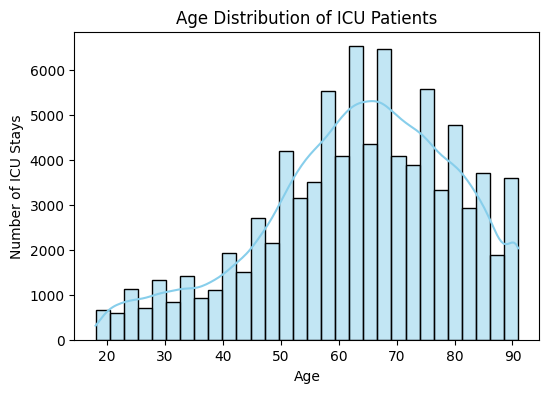

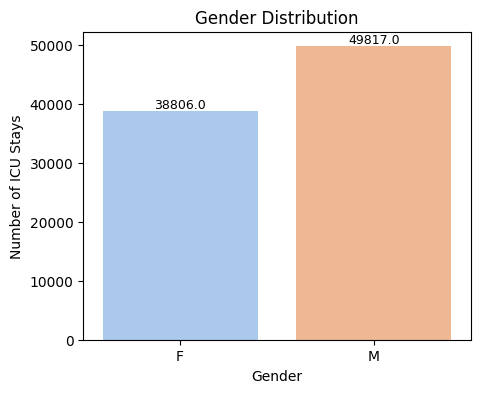

In [6]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Suppress all FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# ===============================
# 1. Age distribution
# ===============================
plt.figure(figsize=(6,4))
sns.histplot(icu_df['age'], bins=30, kde=True, color='skyblue')
plt.title("Age Distribution of ICU Patients")
plt.xlabel("Age")
plt.ylabel("Number of ICU Stays")
plt.show()

# ===============================
# 2. Gender distribution
# ===============================
plt.figure(figsize=(5,4))
ax = sns.countplot(
    x='gender',
    data=icu_df,
    palette='pastel',
    legend=False  # suppress warning
)

# Annotate counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=9)

plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Number of ICU Stays")
plt.show()

## ICU LOS and ICU Unit Overview

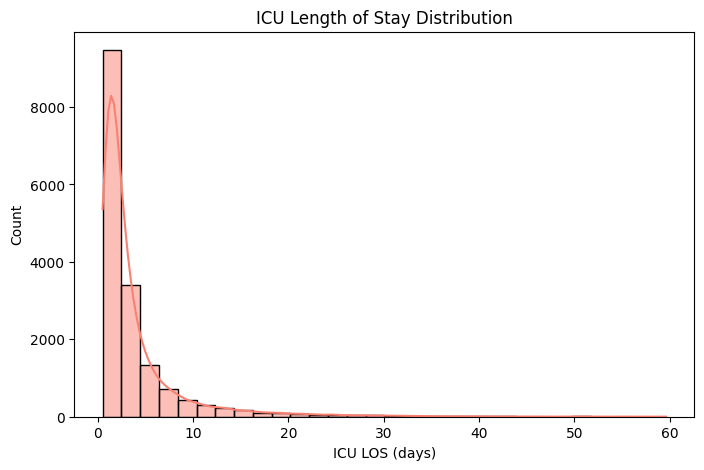

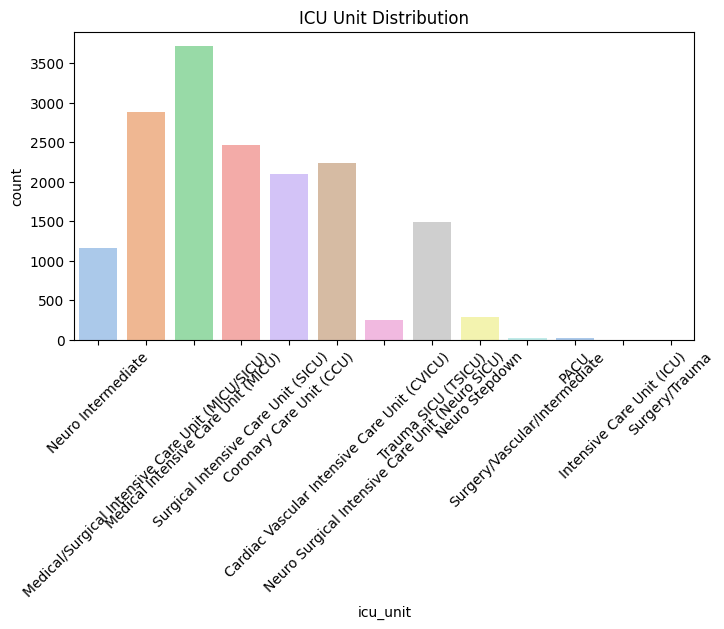

In [6]:
# ICU LOS distribution
plt.figure(figsize=(8,5))
sns.histplot(icu_df['icu_los_days'], bins=30, kde=True, color='salmon')
plt.title("ICU Length of Stay Distribution")
plt.xlabel("ICU LOS (days)")
plt.ylabel("Count")
plt.show()

# ICU unit counts
plt.figure(figsize=(8,4))
sns.countplot(x='icu_unit', data=icu_df, palette='pastel')
plt.title("ICU Unit Distribution")
plt.xticks(rotation=45)
plt.show()

## Analysis of ICU Vitals: Summary, Correlation, and Pairplots

Summary statistics for vitals:
             avg_hr     avg_sysbp    avg_diasbp       avg_spo2      avg_temp
count  88623.000000  88309.000000  88304.000000   88592.000000  83312.000000
mean      84.816749    118.510636     65.251786     102.368185     98.867021
std       16.262680     46.848663     56.595774    1325.698574    162.296643
min       28.500000      0.000000      0.000000      24.000000      0.000000
25%       73.538462    106.416667     56.166667      95.625000     97.900000
50%       83.269231    115.960000     62.851852      97.000000     98.266667
75%       94.888889    128.263158     70.919189      98.325000     98.700000
max      816.500000  10909.400000   5645.611111  390709.360000  46903.160000


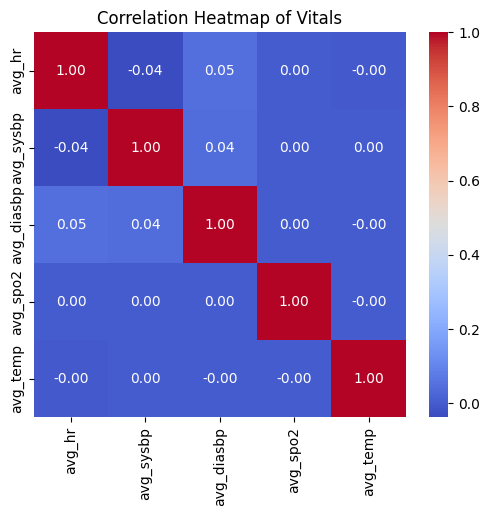

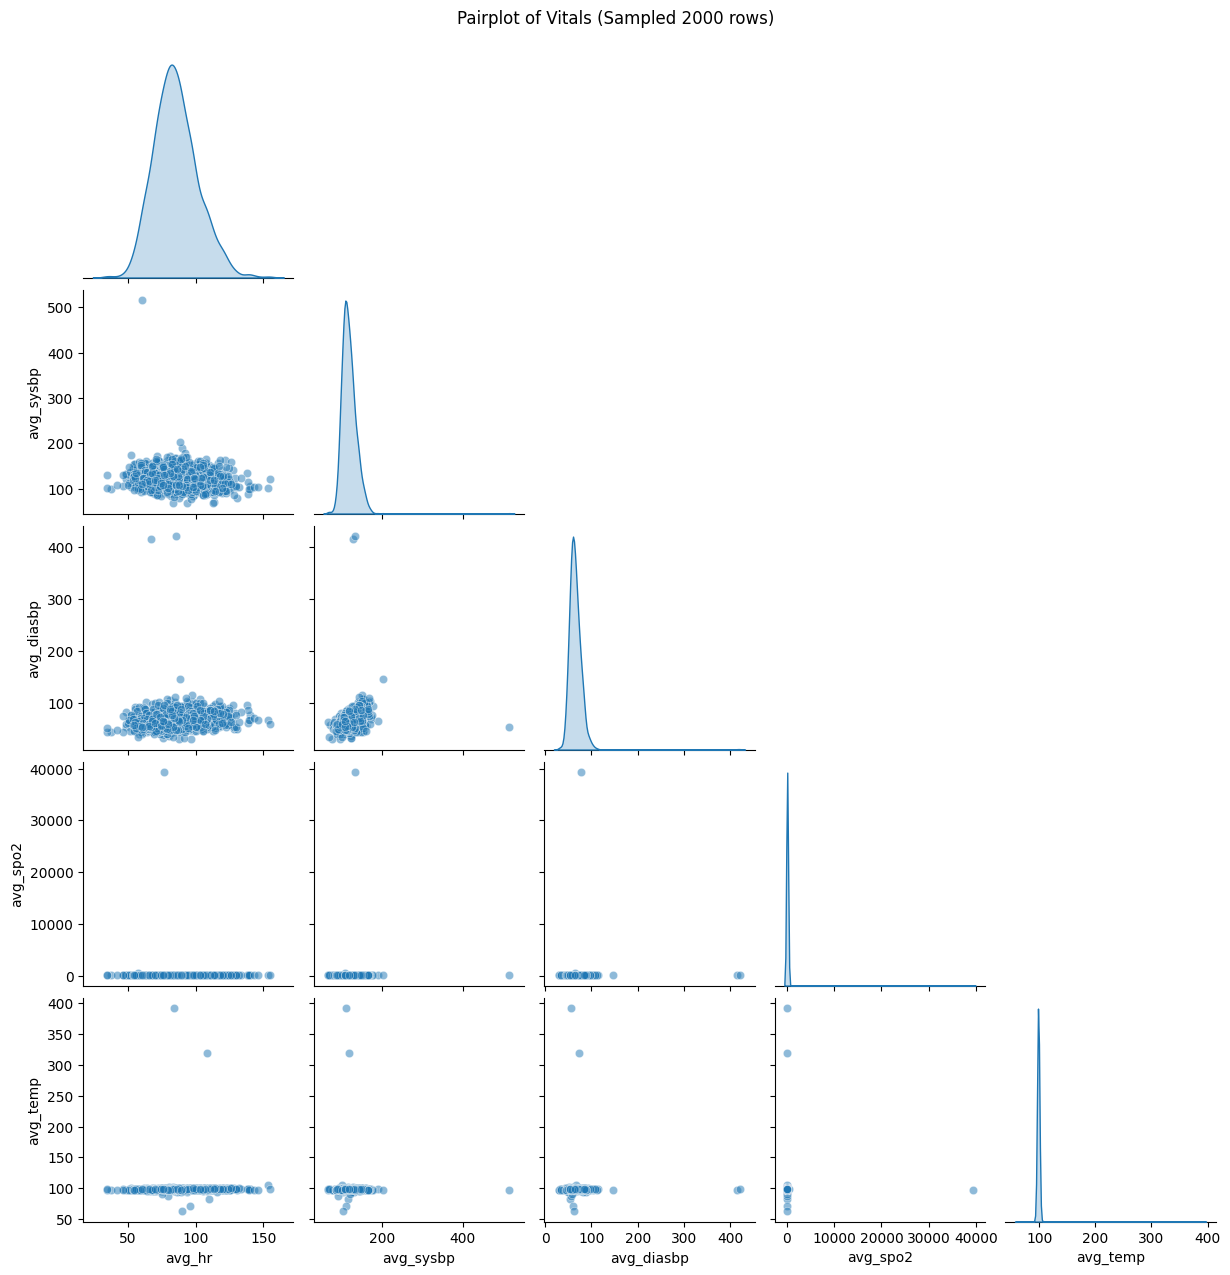

In [4]:
# ===============================
# Vitals columns
# ===============================
vitals_cols = ['avg_hr', 'avg_sysbp', 'avg_diasbp', 'avg_spo2', 'avg_temp']

# ===============================
# 1. Summary statistics
# ===============================
print("Summary statistics for vitals:")
print(icu_df[vitals_cols].describe())

# ===============================
# 2. Correlation heatmap
# ===============================
plt.figure(figsize=(6,5))
corr = icu_df[vitals_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Vitals")
plt.show()

# ===============================
# 3. Pairplot
# ===============================
sample_df = icu_df[vitals_cols].sample(2000, random_state=42)  # sample 2000 rows
sns.pairplot(sample_df, diag_kind='kde', plot_kws={'alpha':0.5}, corner=True)
plt.suptitle("Pairplot of Vitals (Sampled 2000 rows)", y=1.02)
plt.show()

## ICU Lab Values: Summary and Distribution

       avg_creatinine   avg_glucose  avg_hematocrit
count    88623.000000  88572.000000    88546.000000
mean         2.830662    138.296924       23.238695
std          0.897913      4.664460        4.282569
min          0.350000    104.222222        4.000000
25%          2.350000    136.000000       21.000000
50%          2.600000    138.500000       23.000000
75%          3.000000    141.000000       25.500000
max         20.400000    179.000000       50.000000


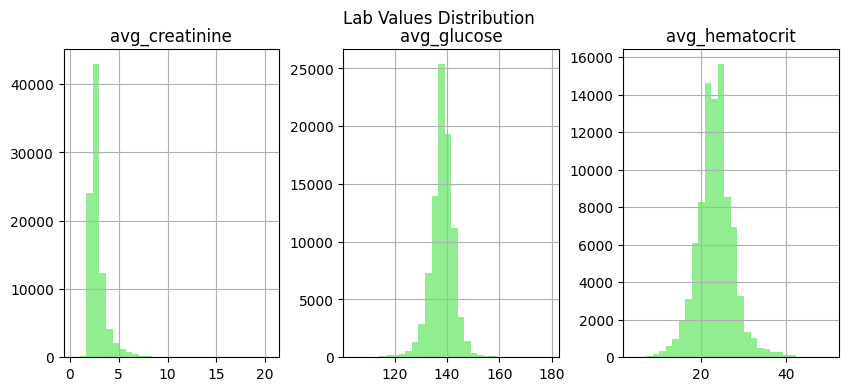

In [5]:
#Lab Values Distribution
lab_cols = ['avg_creatinine', 'avg_glucose', 'avg_hematocrit']

# Summary stats
print(icu_df[lab_cols].describe())

# Histograms
icu_df[lab_cols].hist(bins=30, figsize=(10,4), layout=(1,3), color='lightgreen')
plt.suptitle("Lab Values Distribution")
plt.show()

## Top ICD Diagnoses

diag_E785      19890.0
diag_4019      17984.0
diag_I10       16804.0
diag_Z87891    14235.0
diag_2724      13963.0
diag_I2510     11681.0
diag_K219      10765.0
diag_53081      7994.0
diag_25000      7848.0
diag_F329       7141.0
dtype: float64


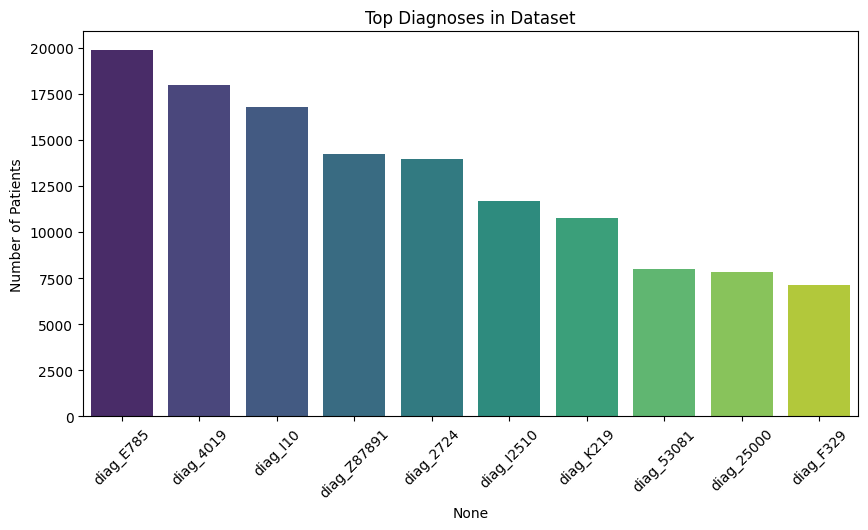

In [7]:
# Count of top ICD diagnosis flags
diag_cols = [col for col in icu_df.columns if col.startswith('diag_')]

diag_counts = icu_df[diag_cols].sum().sort_values(ascending=False)
print(diag_counts)

# Barplot of top diagnoses
plt.figure(figsize=(10,5))
sns.barplot(x=diag_counts.index, y=diag_counts.values, palette='viridis')
plt.xticks(rotation=45)
plt.ylabel("Number of Patients")
plt.title("Top Diagnoses in Dataset")
plt.show()

## ICU Medications: Summary and Usage Counts

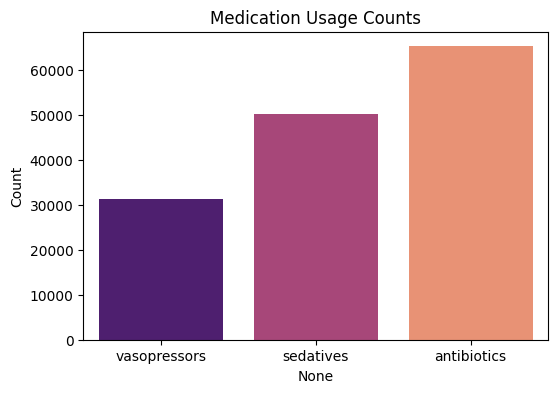

In [7]:
med_cols = ['vasopressors', 'sedatives', 'antibiotics']

icu_df[med_cols].describe()

# Barplot of medication counts
med_sums = icu_df[med_cols].sum()
plt.figure(figsize=(6,4))
sns.barplot(x=med_sums.index, y=med_sums.values, palette='magma')
plt.ylabel("Count")
plt.title("Medication Usage Counts")
plt.show()

## Number of diagnoses per patient

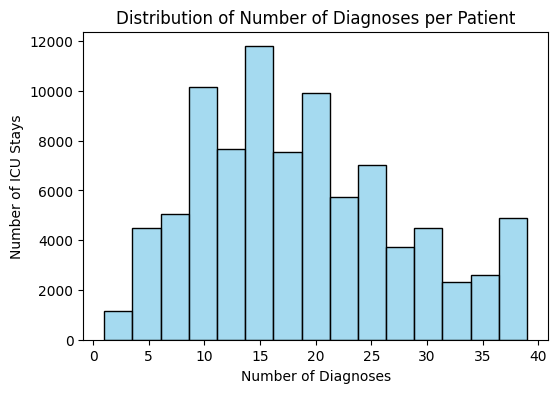

In [8]:
# ===============================
# 2. Number of diagnoses per patient (comorbidity count)
# ===============================
plt.figure(figsize=(6,4))
sns.histplot(icu_df['diagnosis_count'], bins=15, kde=False, color='skyblue')
plt.title("Distribution of Number of Diagnoses per Patient")
plt.xlabel("Number of Diagnoses")
plt.ylabel("Number of ICU Stays")
plt.show()

## Labs vs ICU LOS scatterplots

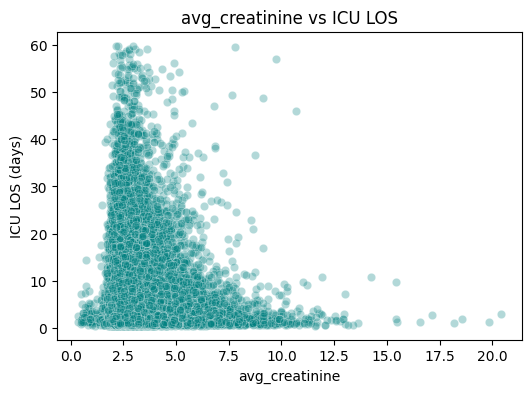

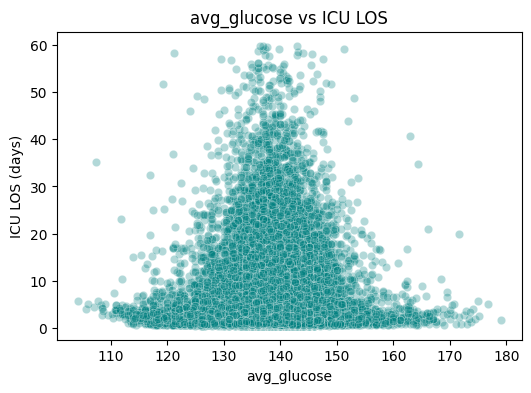

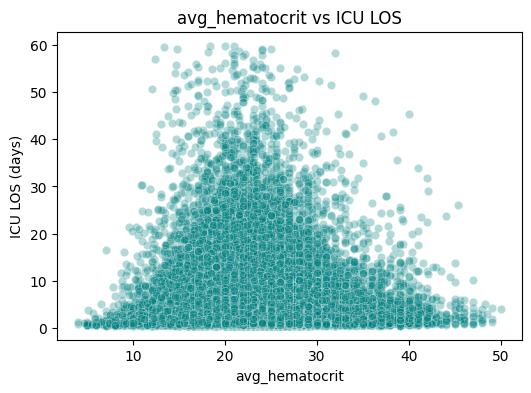

In [9]:
# ===============================
# 3. Labs vs ICU LOS scatterplots
# ===============================
lab_cols = ['avg_creatinine', 'avg_glucose', 'avg_hematocrit']
for lab in lab_cols:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=lab, y='icu_los_days', data=icu_df, alpha=0.3, color='teal')
    plt.title(f"{lab} vs ICU LOS")
    plt.xlabel(lab)
    plt.ylabel("ICU LOS (days)")
    plt.show()

## Medications vs ICU LOS

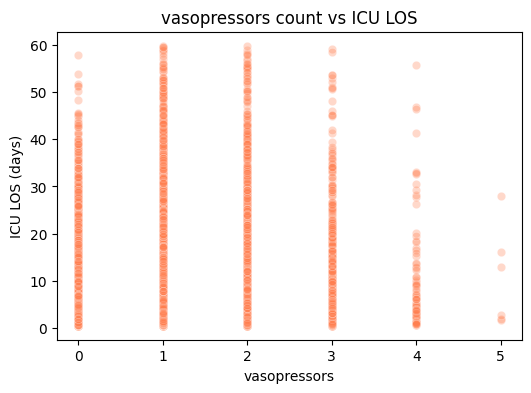

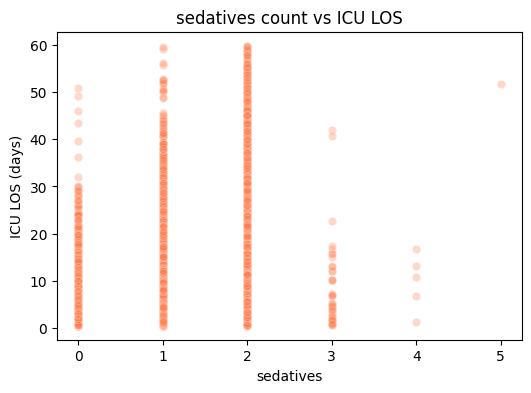

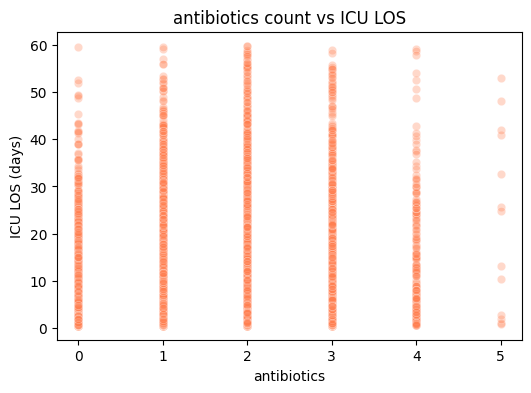

In [10]:
# ===============================
# 4. Medications vs ICU LOS
# ===============================
meds_cols = ['vasopressors', 'sedatives', 'antibiotics']
for med in meds_cols:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=med, y='icu_los_days', data=icu_df, alpha=0.3, color='coral')
    plt.title(f"{med} count vs ICU LOS")
    plt.xlabel(med)
    plt.ylabel("ICU LOS (days)")
    plt.show()

## Pairplot for sample numeric features, age, vitals and lab

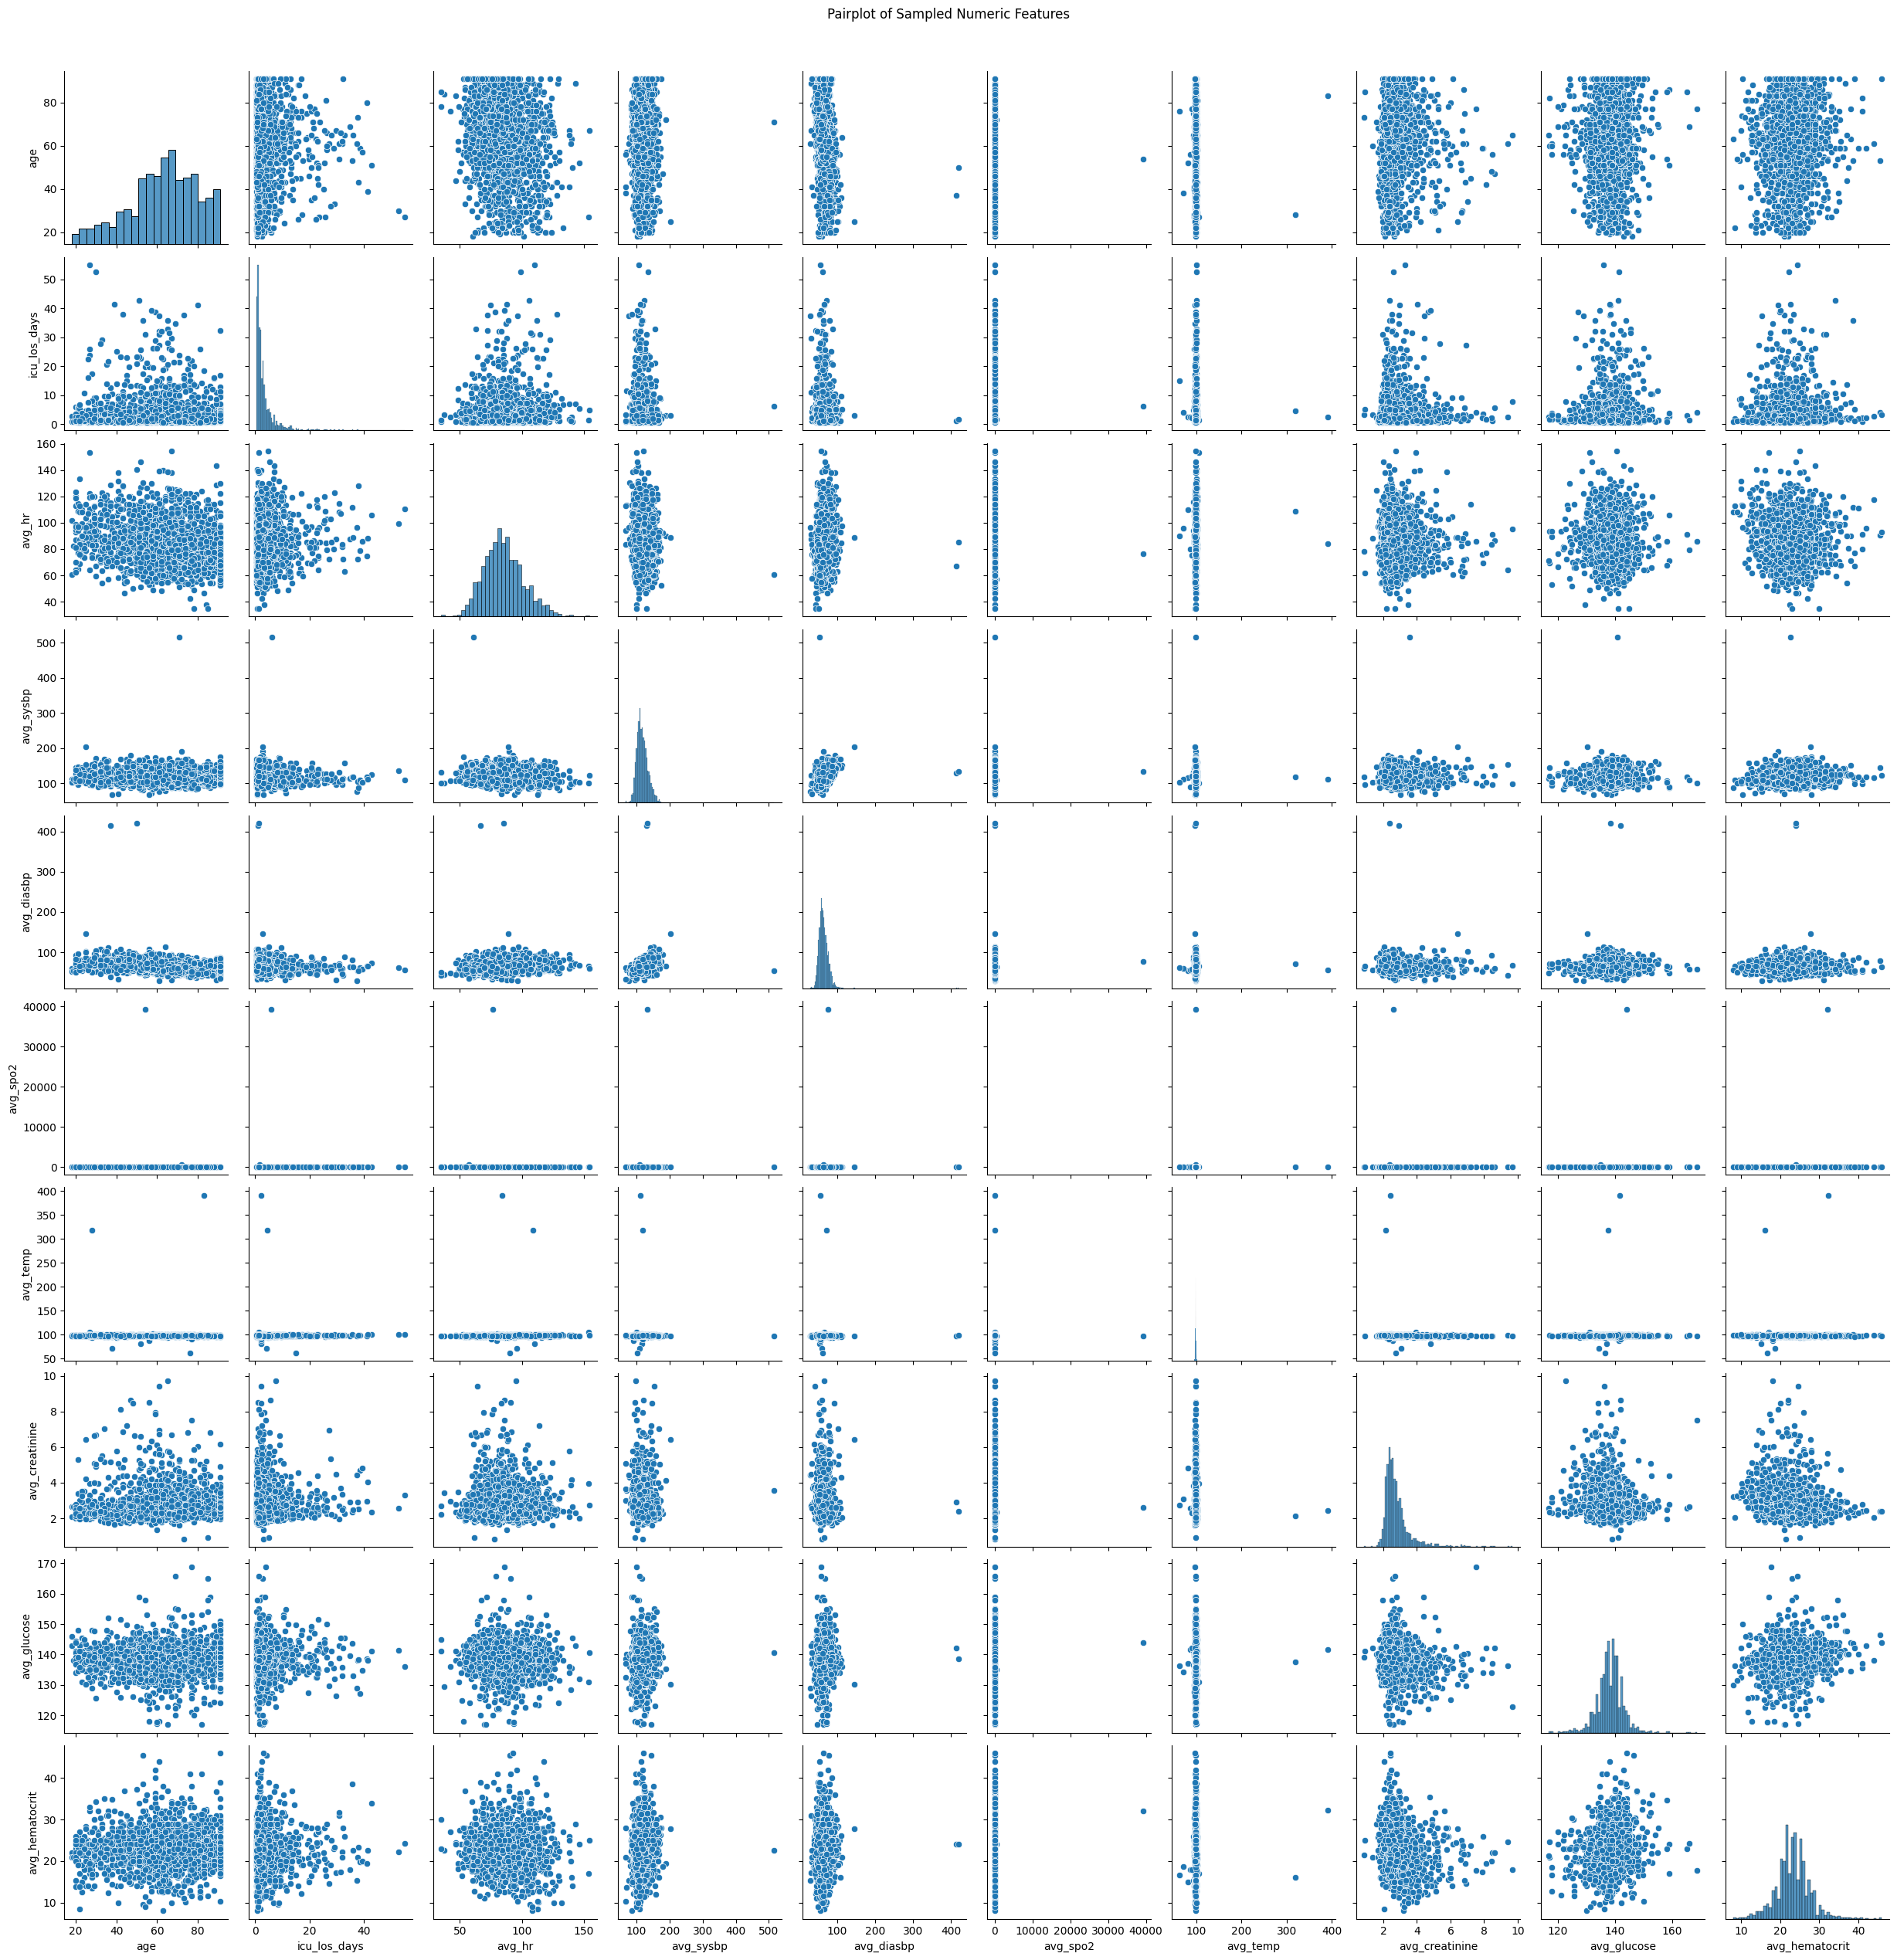

In [11]:
# ===============================
# 5. Pairplot for sample numeric features, age, vitals and lab
# ===============================
numeric_sample_cols = ['age', 'icu_los_days'] + vitals_cols + lab_cols
sample_df = icu_df[numeric_sample_cols].sample(n=2000, random_state=42)

sns.pairplot(sample_df)
plt.suptitle("Pairplot of Sampled Numeric Features", y=1.02)
plt.show()

## Correlation heatmap with top medications

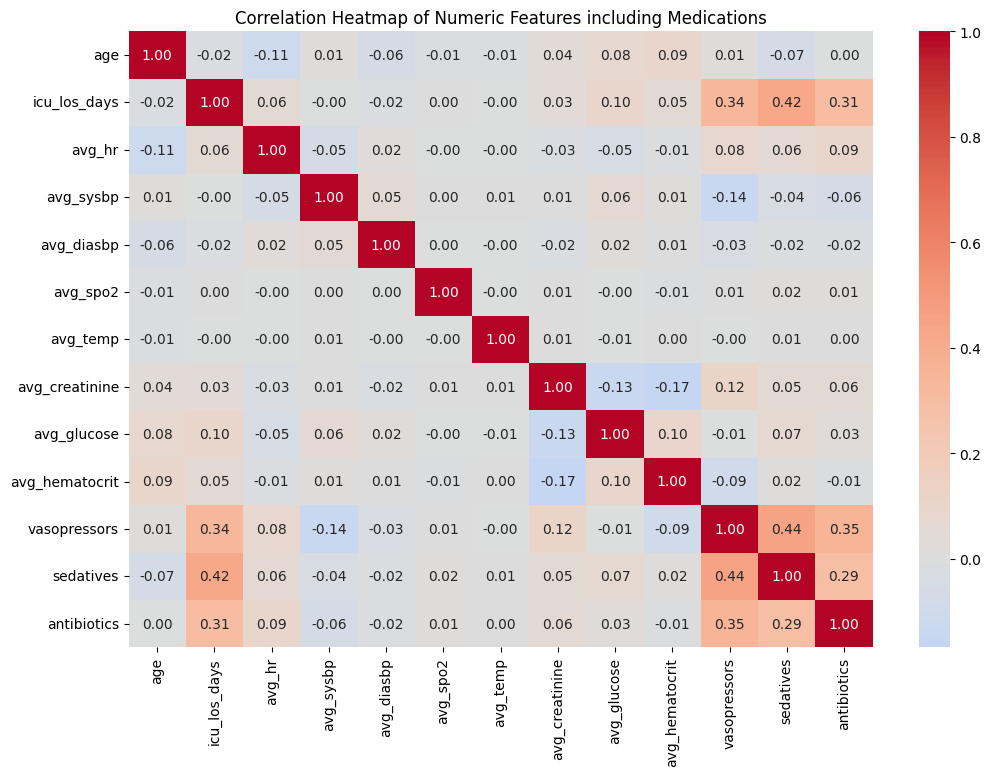

In [16]:
# ===============================
# 6. Correlation heatmap with top medications
# ===============================
numeric_corr_cols = numeric_sample_cols + meds_cols
plt.figure(figsize=(12,8))
corr = icu_df[numeric_corr_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Numeric Features including Medications")
plt.show()